# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


In [3]:
#API Response check

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city="faya"
city_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(city_url + city).json()
response

{'coord': {'lon': 42.4509, 'lat': 18.3851},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 9.29,
  'feels_like': 7.06,
  'temp_min': 9.29,
  'temp_max': 10.06,
  'pressure': 1021,
  'humidity': 51,
  'sea_level': 1021,
  'grnd_level': 789},
 'visibility': 10000,
 'wind': {'speed': 4.15, 'deg': 55, 'gust': 4.54},
 'clouds': {'all': 65},
 'dt': 1702529811,
 'sys': {'type': 1,
  'id': 7396,
  'country': 'SA',
  'sunrise': 1702524815,
  'sunset': 1702564548},
 'timezone': 10800,
 'id': 110690,
 'name': 'Faya',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url + city).json()
        city_weather =response['main']['temp']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | la sarre
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | cozumel
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | morondava
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | hauterive
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | guangyuan
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | aquitania
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | lebu
Processing Record 22 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.99,79,76,19.36,TF,1702529974
1,waitangi,-43.9535,-176.5597,12.12,83,67,4.02,NZ,1702529974
2,tura,25.5198,90.2201,21.55,42,0,0.91,IN,1702529974
3,la sarre,48.8002,-79.1996,-10.83,91,84,2.59,CA,1702529723
4,vorgashor,67.5833,63.9500,-16.78,97,99,3.48,RU,1702529975


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

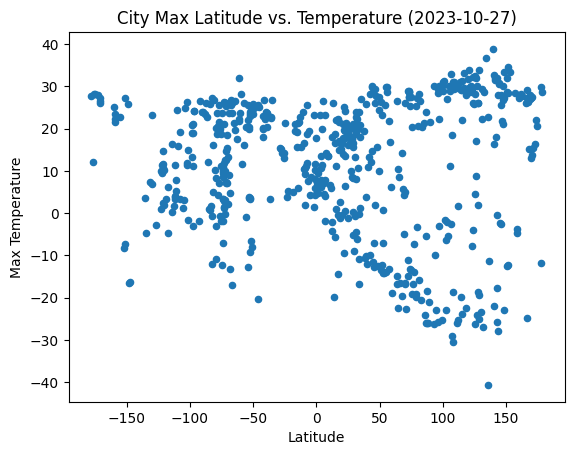

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot(
                x='Lng',
                y='Max Temp',
                kind="scatter",
                xlabel=("Latitude"),
                ylabel=("Max Temperature") ,
                title="City Max Latitude vs. Temperature (2023-10-27)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

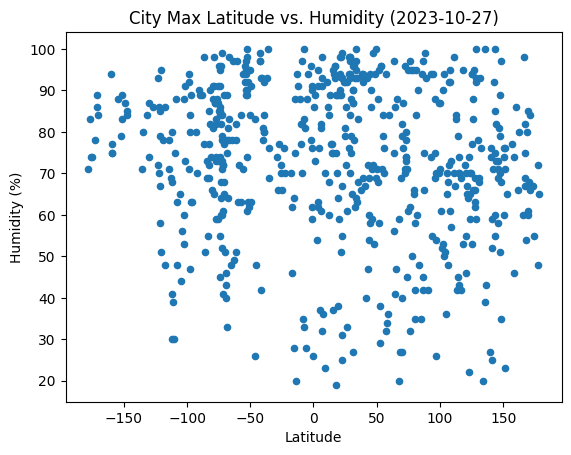

In [9]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(
                x='Lng',
                y='Humidity',
                kind="scatter",
                xlabel=("Latitude"),
                ylabel=("Humidity (%)") ,
                title="City Max Latitude vs. Humidity (2023-10-27)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

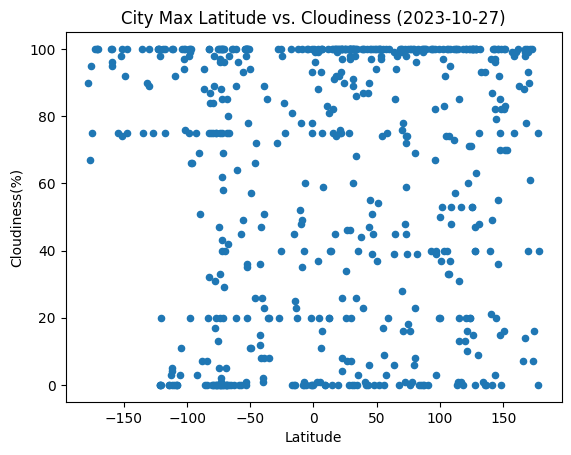

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot(
                x='Lng',
                y='Cloudiness',
                kind="scatter",
                xlabel=("Latitude"),
                ylabel=("Cloudiness(%)") ,
                title="City Max Latitude vs. Cloudiness (2023-10-27)")



# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

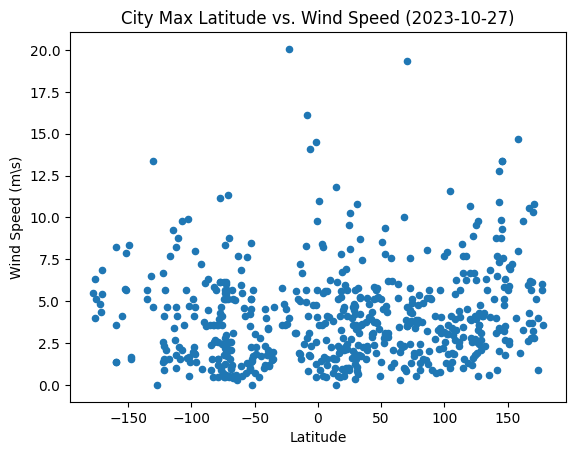

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot(
                x='Lng',
                y='Wind Speed',
                kind="scatter",
                xlabel=("Latitude"),
                ylabel=("Wind Speed (m\s)") ,
                title="City Max Latitude vs. Wind Speed (2023-10-27)")



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]
southern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(northern_df)
# Display sample data

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,tura,25.5198,90.2201,21.55,42,0,0.91,IN,1702529974
3,la sarre,48.8002,-79.1996,-10.83,91,84,2.59,CA,1702529723
4,vorgashor,67.5833,63.9500,-16.78,97,99,3.48,RU,1702529975
5,cozumel,20.5083,-86.9458,26.08,98,94,4.47,MX,1702529760
8,yellowknife,62.4560,-114.3525,0.31,71,0,9.26,CA,1702529698


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(southern_df)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.99,79,76,19.36,TF,1702529974
1,waitangi,-43.9535,-176.5597,12.12,83,67,4.02,NZ,1702529974
6,puerto natales,-51.7236,-72.4875,3.07,79,62,2.20,CL,1702529975
7,morondava,-20.2833,44.2833,29.79,60,47,2.38,MG,1702529976
10,grytviken,-54.2811,-36.5092,3.32,93,85,1.50,GS,1702529976


In [15]:
#Cities were captured
northern_hemi_df.count()+southern_hemi_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.857


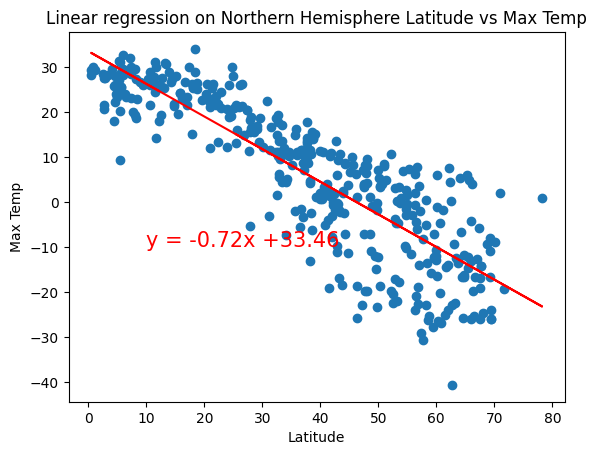

In [17]:
# Linear regression on Northern Hemisphere
from scipy import stats


x_values=pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear regression on Northern Hemisphere Latitude vs Max Temp')
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

The r-value is: 0.655


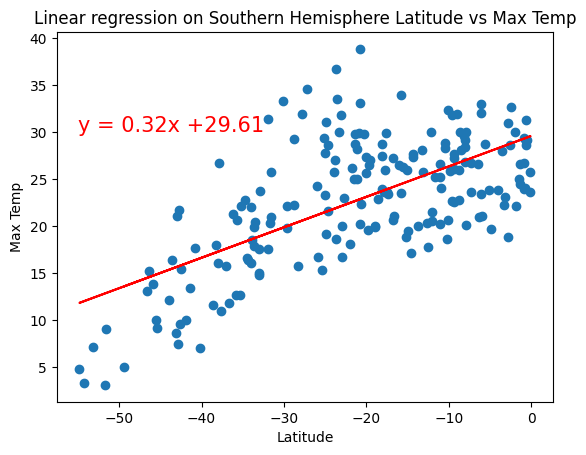

In [18]:
# Linear regression on Southern Hemisphere
x_values=pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear regression on Southern Hemisphere Latitude vs Max Temp')
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

#### **Discussion about the linear relationship**

In the northern, there is a negative correlation  whereas the temperature went down as we move away from the equator. The southern regression shows that there is a positive correlation and the temperature went up as we move closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.362


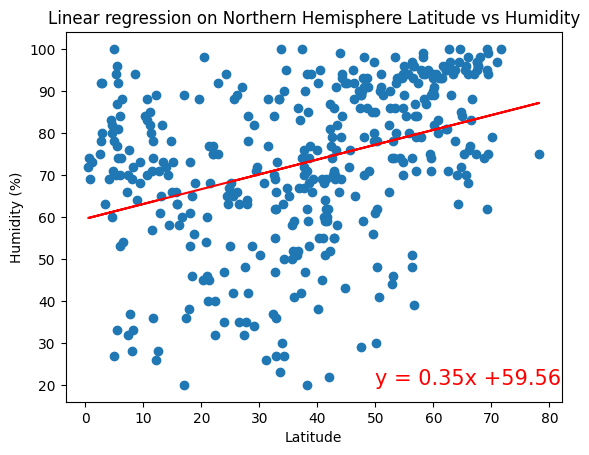

In [19]:
# Northern Hemisphere
x_values=pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(northern_hemi_df['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear regression on Northern Hemisphere Latitude vs Humidity')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

The r-value is: 0.214


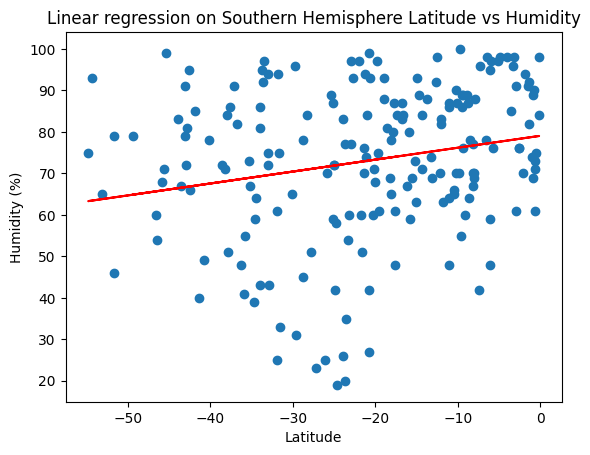

In [20]:
# Southern Hemisphere
x_values=pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(southern_hemi_df['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear regression on Southern Hemisphere Latitude vs Humidity')
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

#### **Discussion about the linear relationship:** 

There is not much regression that is shown.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3157


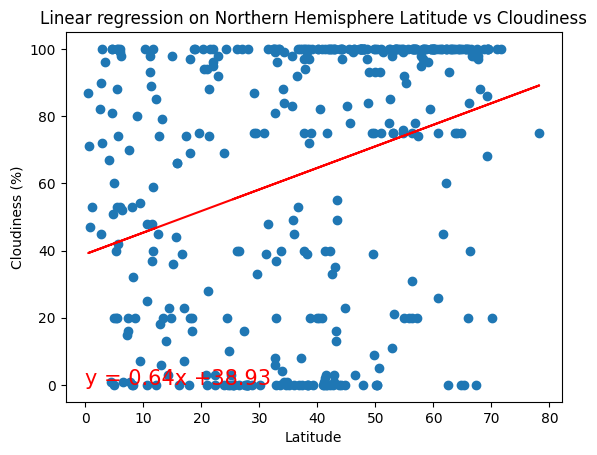

In [21]:
# Northern Hemisphere
x_values=pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Linear regression on Northern Hemisphere Latitude vs Cloudiness')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
rvalue_print=round(rvalue,4)
print(f"The r-value is: {rvalue_print}")
plt.show()

The r-value is: 0.191


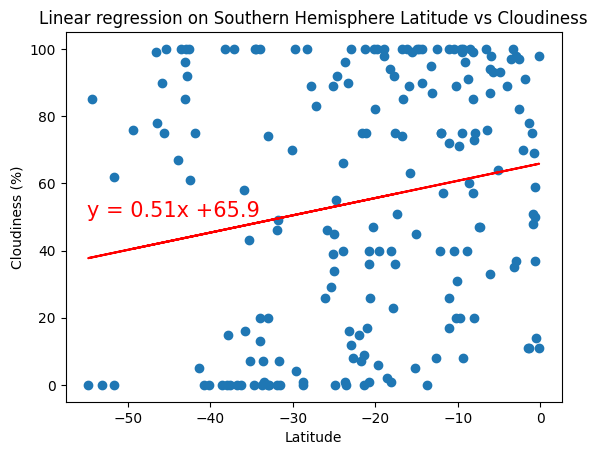

In [22]:
# Southern Hemisphere
x_values=pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Linear regression on Southern Hemisphere Latitude vs Cloudiness')
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

#### **Discussion about the linear relationship:** 

There are no correlations between the data shown.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.154


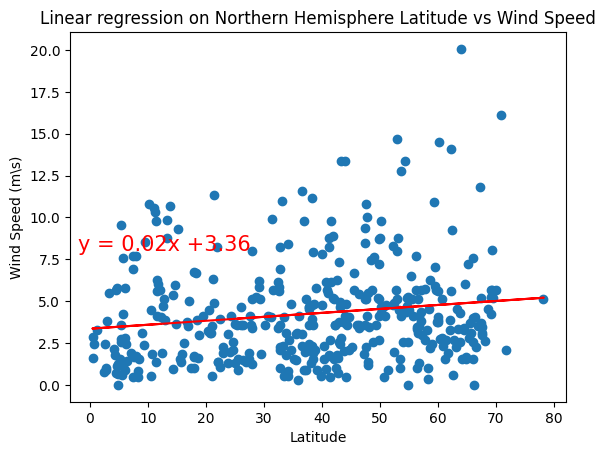

In [23]:
# Northern Hemisphere
x_values=pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m\s)')
plt.title('Linear regression on Northern Hemisphere Latitude vs Wind Speed')
plt.annotate(line_eq,(-2,8),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

The r-value is: -0.207


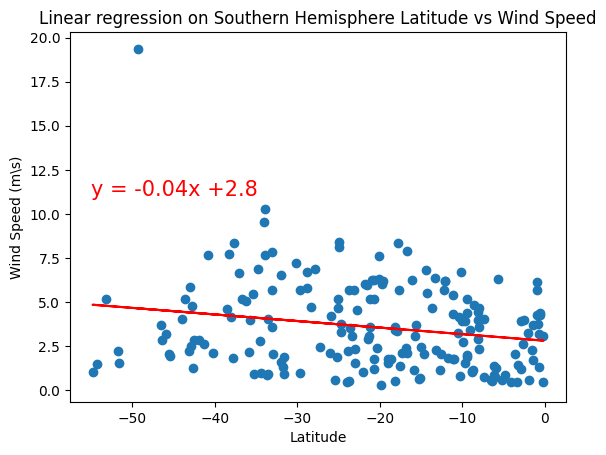

In [24]:
# Southern Hemisphere
x_values=pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m\s)')
plt.title('Linear regression on Southern Hemisphere Latitude vs Wind Speed')
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

#### **Discussion about the linear relationship:** 

The regression does not show much correlation between the data sets.